In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 1.0) Data Description

### 1.1) Import Data

In [4]:
df = pd.read_csv('dataset.csv')
df.head()

,Gender,Age,Height(cm),Weight(kg),Family_history,Alcohol,Junk_food,Vege_day,Meals_day,Snack,Smoking,Water_intake(L),Transportation,Exercise,TV,Income,Discipline,Cardiovascular_risk(y)
0,Female,42,172.2,82.9,no,low,yes,3,3,Sometimes,no,2.72,car,3,rare,2081,no,medium
1,Female,19,175.3,80.0,yes,none,yes,2,1,Sometimes,no,2.65,bus,3,moderate,5551,no,medium
2,Female,43,158.3,81.9,yes,none,yes,3,1,Sometimes,no,1.89,car,1,rare,14046,no,high
3,Female,23,165.0,70.0,yes,low,no,2,1,Sometimes,no,2.00,bus,0,rare,9451,no,medium
4,Male,23,169.0,75.0,yes,low,yes,3,3,Sometimes,no,2.82,bus,1,often,17857,no,medium


### 1.2) Describe and preview

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  2100 non-null   object 
 1   Age                     2100 non-null   int64  
 2   Height(cm)              2100 non-null   float64
 3   Weight(kg)              2100 non-null   float64
 4   Family_history          2100 non-null   object 
 5   Alcohol                 2100 non-null   object 
 6   Junk_food               2100 non-null   object 
 7   Vege_day                2100 non-null   int64  
 8   Meals_day               2100 non-null   int64  
 9   Snack                   2100 non-null   object 
 10  Smoking                 2100 non-null   object 
 11  Water_intake(L)         2100 non-null   float64
 12  Transportation          2100 non-null   object 
 13  Exercise                2100 non-null   int64  
 14  TV                      2100 non-null   

In [7]:
df.describe()

,Age,Height(cm),Weight(kg),Vege_day,Meals_day,Water_intake(L),Exercise,Income
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,24.302381,170.148286,86.561571,2.423333,2.687143,2.007429,1.006190,9432.386190
std,6.342270,9.340941,26.192242,0.584318,0.810088,0.613122,0.894885,5002.350673
min,14.000000,145.000000,39.000000,1.000000,1.000000,1.000000,0.000000,1000.000000
25%,20.000000,163.000000,65.400000,2.000000,3.000000,1.577500,0.000000,4994.500000
50%,23.000000,170.000000,83.000000,2.000000,3.000000,2.000000,1.000000,9226.500000
75%,26.000000,176.800000,107.250000,3.000000,3.000000,2.480000,2.000000,13841.750000
max,61.000000,198.000000,173.000000,3.000000,4.000000,3.000000,3.000000,18000.000000


# 2.0) Data Exploration and Visualization

In [9]:
df.shape

(2100, 18)

### 2.1) Check for missing values

In [11]:
df.isnull().sum()

Gender                    0
Age                       0
Height(cm)                0
Weight(kg)                0
Family_history            0
Alcohol                   0
Junk_food                 0
Vege_day                  0
Meals_day                 0
Snack                     0
Smoking                   0
Water_intake(L)           0
Transportation            0
Exercise                  0
TV                        0
Income                    0
Discipline                0
Cardiovascular_risk(y)    0
dtype: int64

### 2.2) Display unique values for categorical columns

In [14]:
categorical_columns = df.select_dtypes(include='object').columns
print("\nUnique values in categorical columns:")
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")


Unique values in categorical columns:
Gender: ['Female' 'Male']
Family_history: ['no' 'yes']
Alcohol: ['low' 'none' 'medium' 'high']
Junk_food: ['yes' 'no']
Snack: ['Sometimes' 'Always' 'Frequently' 'No']
Smoking: ['no' 'yes']
Transportation: ['car' 'bus' 'walk' 'motorcycle' 'bicycle']
TV: ['rare' 'moderate' 'often']
Discipline: ['no' 'yes']
Cardiovascular_risk(y): ['medium' 'high' 'low']


### 2.3) Visualize the distribution of numerical features

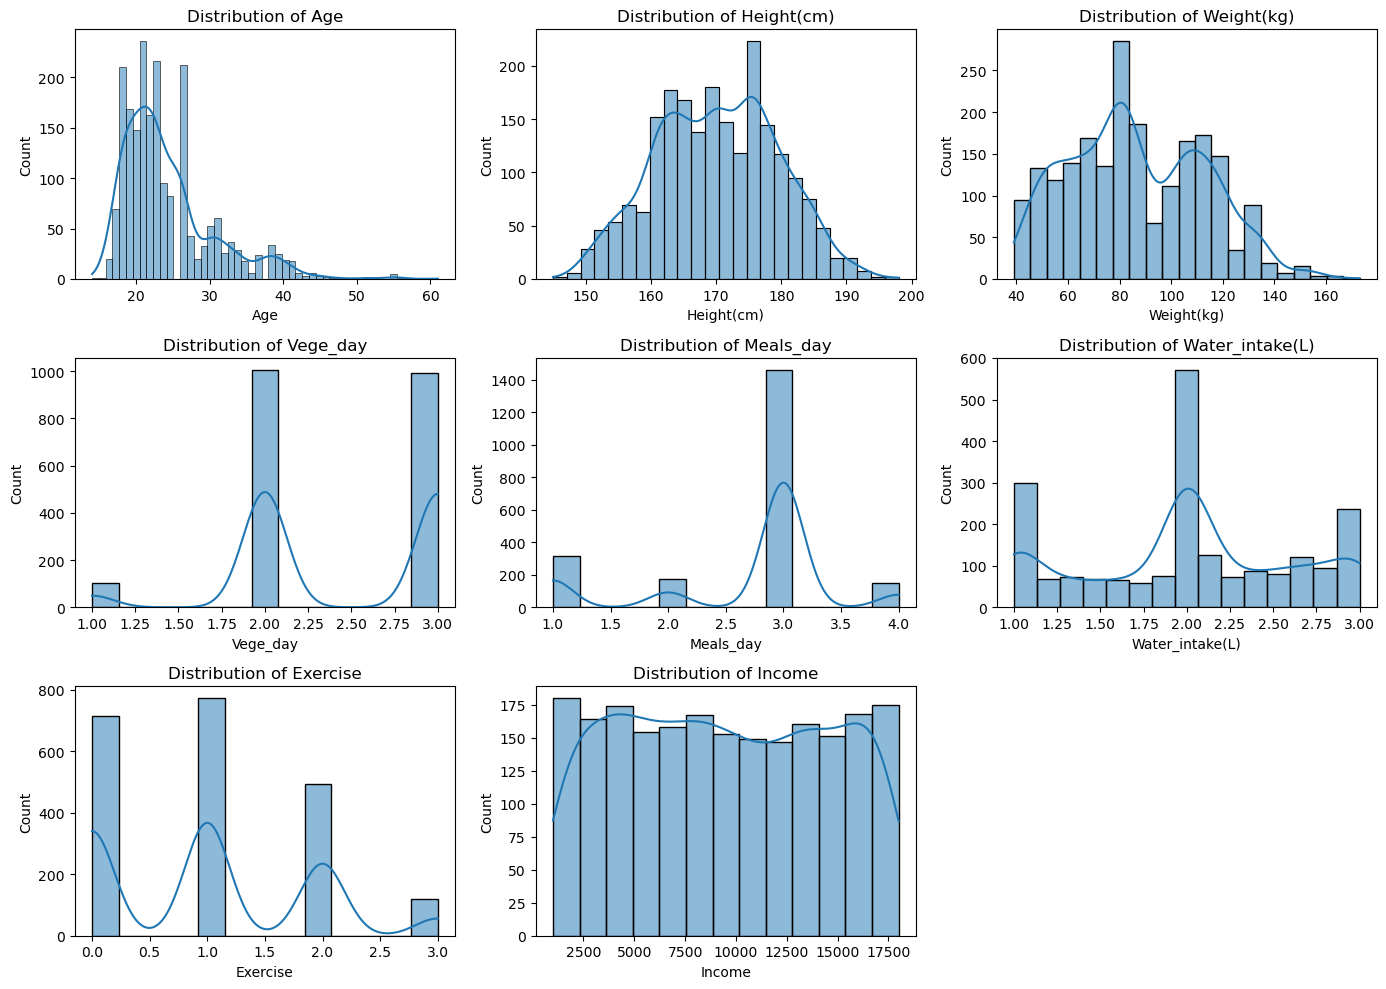

In [16]:
import seaborn as sns

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns


plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### 2.4) Boxplots to detect outliers in numerical data

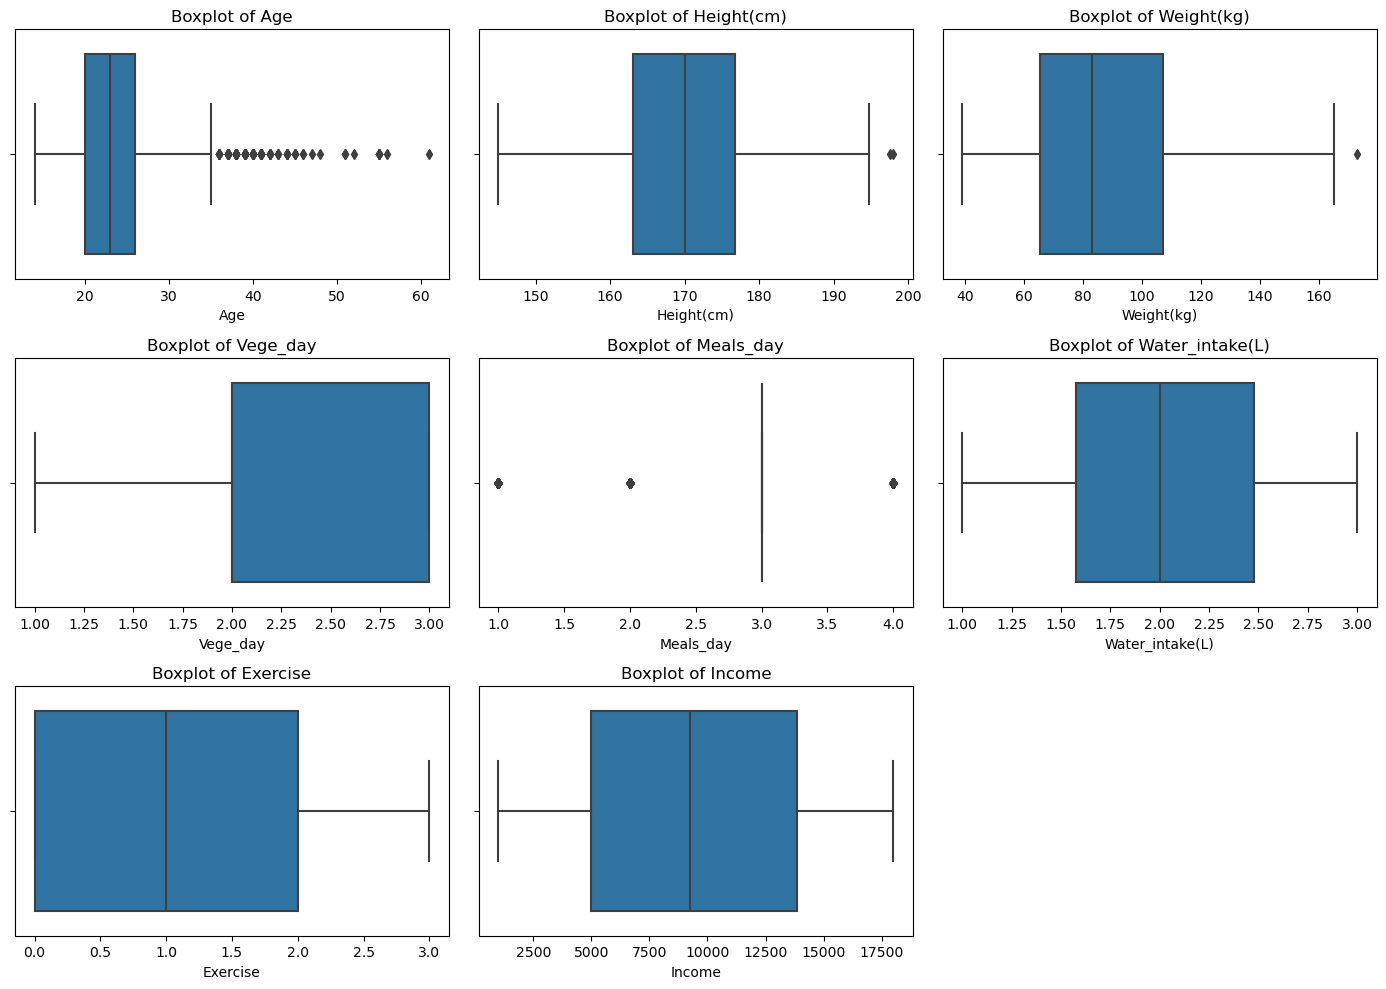

In [18]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

### 2.5) Visualize the relationships between numerical features using a pair plot

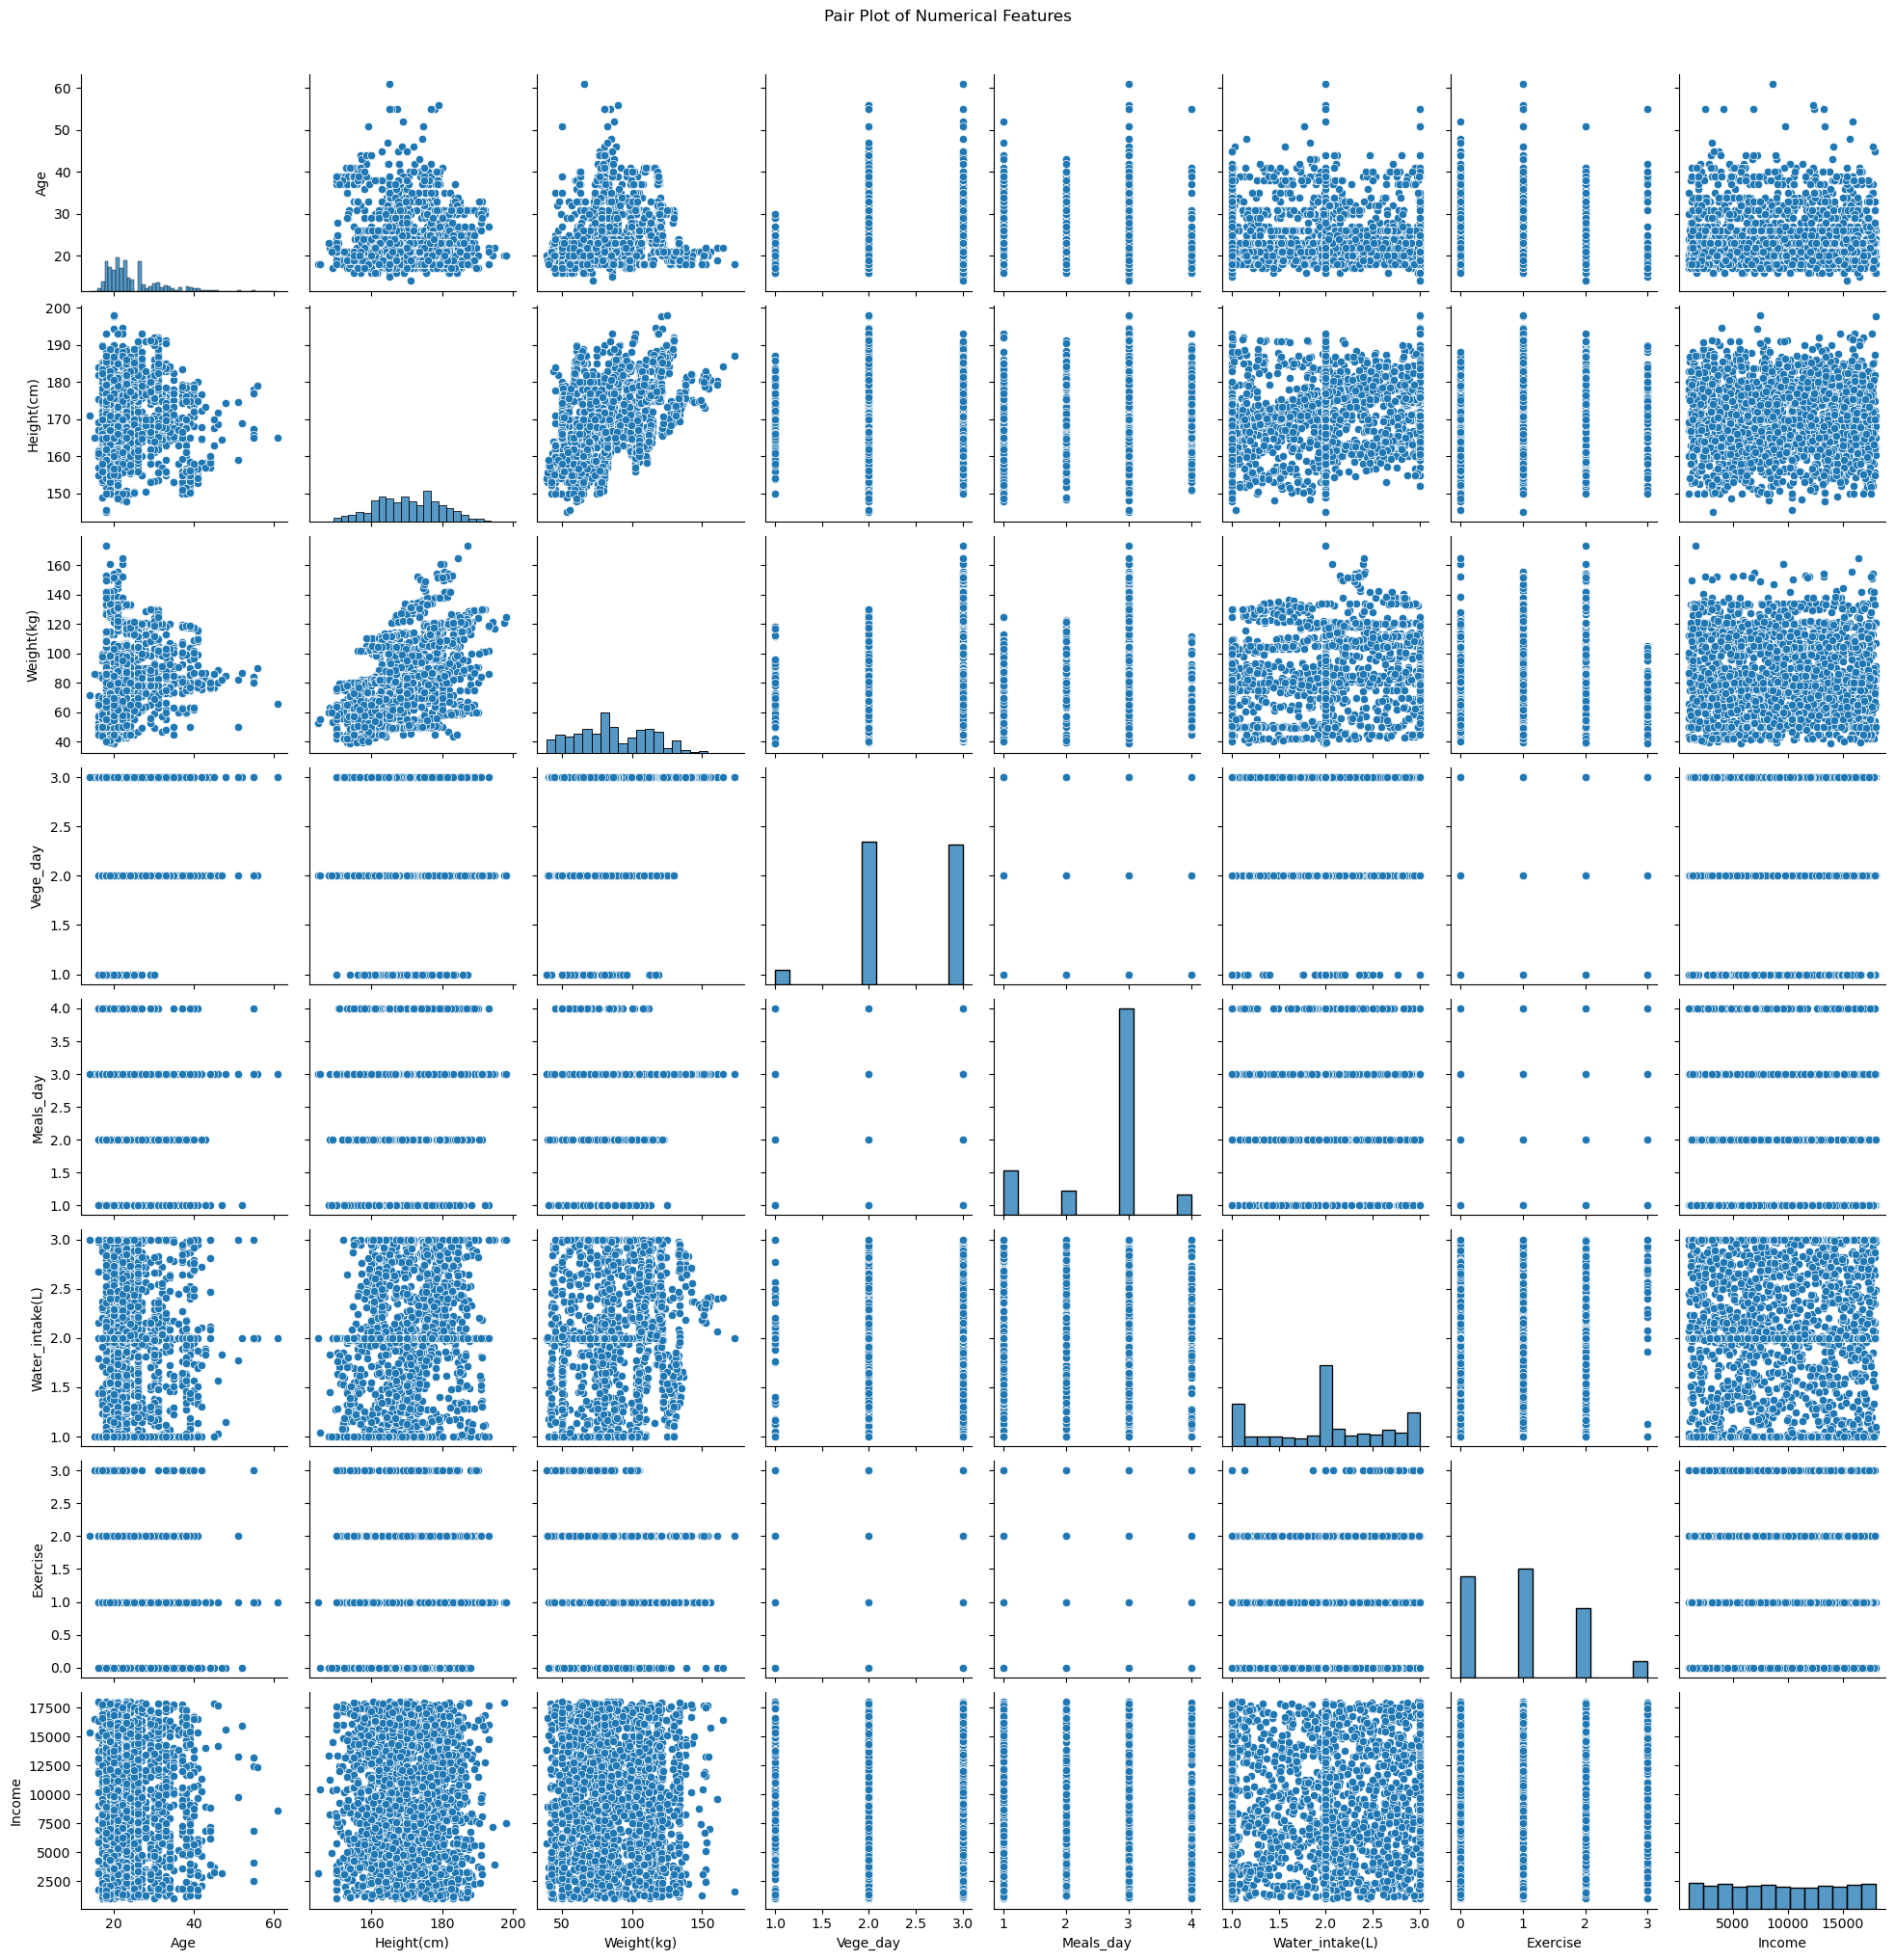

In [20]:
sns.pairplot(df[numerical_columns])
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

### 2.6) Visualize correlations between numerical features

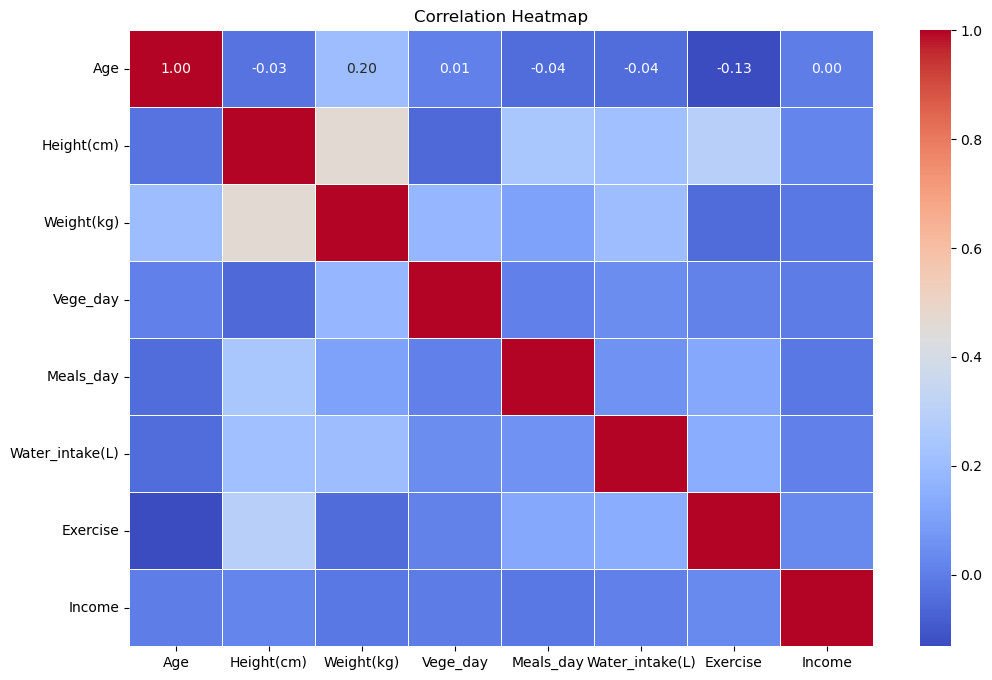

In [22]:
plt.figure(figsize=(12, 8))
corr = df[numerical_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


### 2.7) Count plots for categorical features

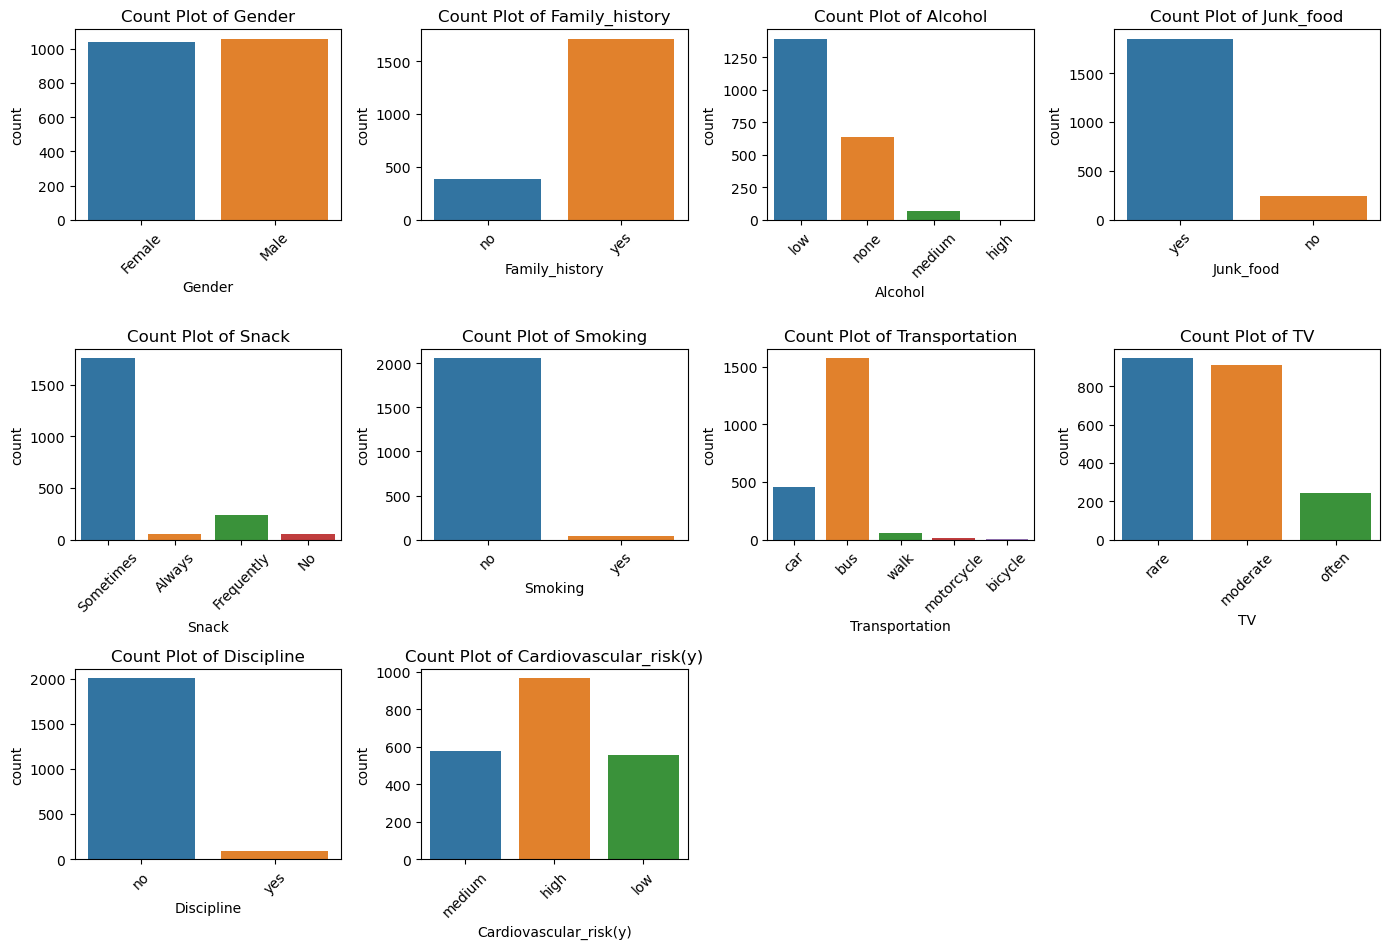

In [24]:
plt.figure(figsize=(14, 12))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f'Count Plot of {col}')
plt.tight_layout()
plt.show()

### 2.8) Analyze the target variable distribution

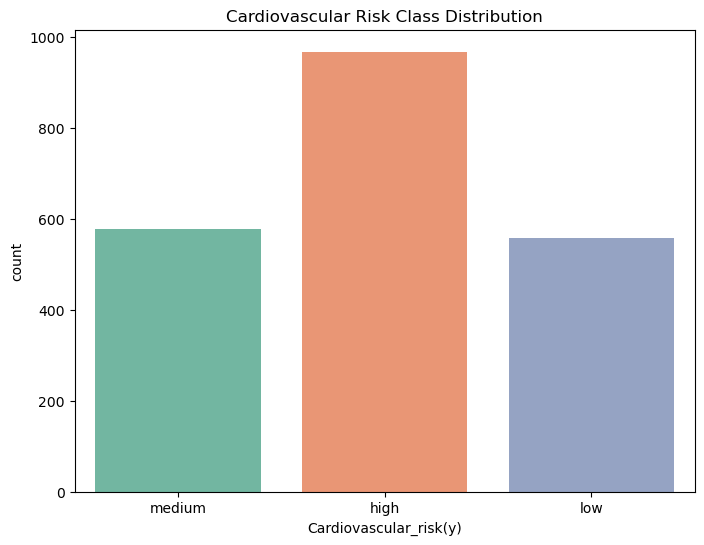

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Cardiovascular_risk(y)', palette='Set2')
plt.title("Cardiovascular Risk Class Distribution")
plt.show()

### 2.9) Boxplot of relationship between weight and Cardiovascular risk

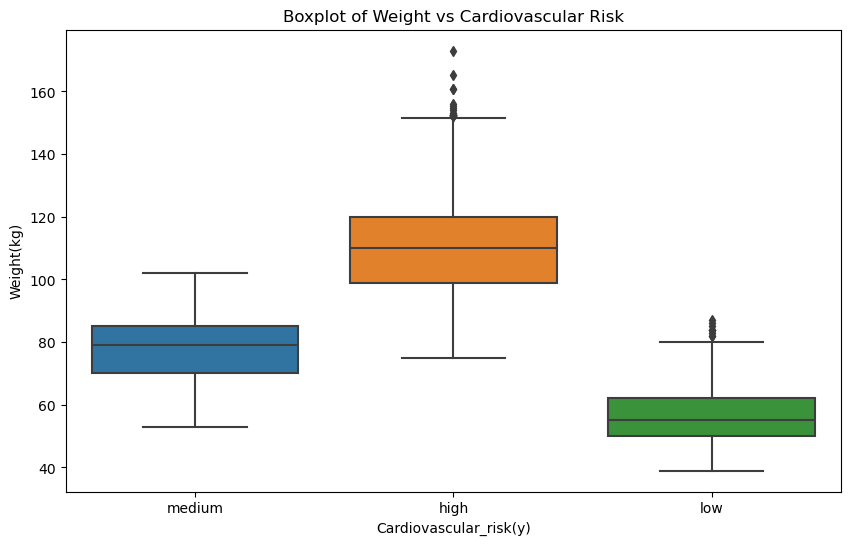

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Cardiovascular_risk(y)', y='Weight(kg)')
plt.title("Boxplot of Weight vs Cardiovascular Risk")
plt.show()

### 2.10 Scatter plot of Age vs Weight (if BMI is calculated)

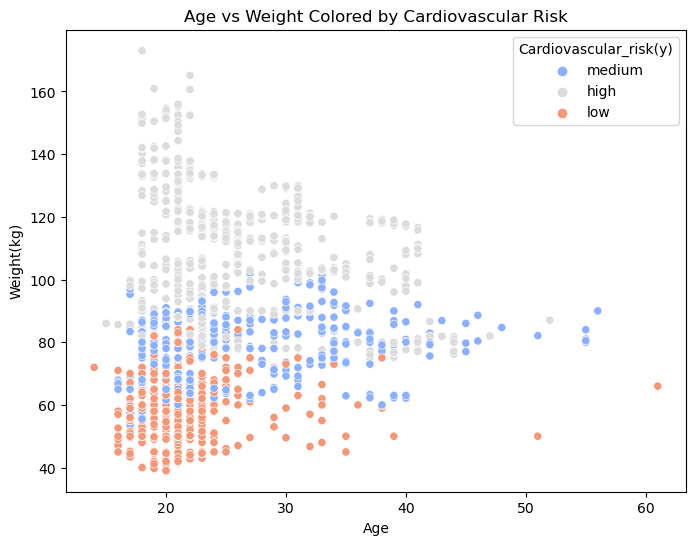

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Weight(kg)', hue='Cardiovascular_risk(y)', palette='coolwarm')
plt.title("Age vs Weight Colored by Cardiovascular Risk")
plt.show()

# 3.0) Preprocessing 

### 3.1) Split Training and Test set 

In [33]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, random_state=42)
train.shape
print(train['Cardiovascular_risk(y)'].value_counts())

Cardiovascular_risk(y)
high      675
medium    405
low       390
Name: count, dtype: int64


### 3.2) Apply Undersampling methods to ensure dataset balance

In [35]:
from sklearn.utils import resample

df_high = train[train['Cardiovascular_risk(y)'] == 'high']
df_medium = train[train['Cardiovascular_risk(y)'] == 'medium']
df_low = train[train['Cardiovascular_risk(y)'] == 'low']

n = min(len(df_medium), len(df_low))

df_high_undersampled = resample(df_high, 
                                replace=False,   
                                n_samples=n, 
                                random_state=42) 


In [36]:
train_balanced = pd.concat([df_high_undersampled, df_medium, df_low])

In [37]:
train = train_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [38]:
print(train['Cardiovascular_risk(y)'].value_counts())

Cardiovascular_risk(y)
medium    405
high      390
low       390
Name: count, dtype: int64


### 3.3) Split training set into numerical and categorical

In [40]:
X= train.drop('Cardiovascular_risk(y)', axis=1)
y= train['Cardiovascular_risk(y)'].copy()

### 3.4) Create pipeline 

In [42]:
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num= ['Age', 'Height(cm)', 'Weight(kg)', 'Water_intake(L)', 'Income']
cat = ['Gender', 'Family_history', 'Alcohol', 'Junk_food', 'Vege_day', 'Meals_day', 
                        'Snack', 'Smoking', 'Transportation', 'Exercise', 'TV', 'Discipline']

num_pipe = make_pipeline( 
    SimpleImputer(strategy = "median"), 
    StandardScaler()
)

cat_pipe = make_pipeline(
    SimpleImputer(strategy = "most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessing = ColumnTransformer([ 
    ("num", num_pipe, num),
    ("cat", cat_pipe, cat)
])


### 3.5) Test pipeline

In [44]:
X_prep = preprocessing.fit_transform(X)
X_prep

array([[ 0.31080288, -0.38147556,  1.23472699, ...,  1.        ,
         1.        ,  0.        ],
       [-0.14957388, -0.71529859, -1.44080924, ...,  1.        ,
         0.        ,  1.        ],
       [-0.45649172, -0.29801981, -0.56358425, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.3030328 ,  0.01493928, -0.44396266, ...,  0.        ,
         1.        ,  0.        ],
       [-0.76340956, -1.49769632, -1.47270833, ...,  1.        ,
         0.        ,  1.        ],
       [-0.76340956, -1.47683238, -1.65214072, ...,  0.        ,
         1.        ,  0.        ]])

In [45]:
preprocessing.get_feature_names_out()

array(['num__Age', 'num__Height(cm)', 'num__Weight(kg)',
       'num__Water_intake(L)', 'num__Income', 'cat__Gender_Female',
       'cat__Gender_Male', 'cat__Family_history_no',
       'cat__Family_history_yes', 'cat__Alcohol_high', 'cat__Alcohol_low',
       'cat__Alcohol_medium', 'cat__Alcohol_none', 'cat__Junk_food_no',
       'cat__Junk_food_yes', 'cat__Vege_day_1', 'cat__Vege_day_2',
       'cat__Vege_day_3', 'cat__Meals_day_1', 'cat__Meals_day_2',
       'cat__Meals_day_3', 'cat__Meals_day_4', 'cat__Snack_Always',
       'cat__Snack_Frequently', 'cat__Snack_No', 'cat__Snack_Sometimes',
       'cat__Smoking_no', 'cat__Smoking_yes',
       'cat__Transportation_bicycle', 'cat__Transportation_bus',
       'cat__Transportation_car', 'cat__Transportation_motorcycle',
       'cat__Transportation_walk', 'cat__Exercise_0', 'cat__Exercise_1',
       'cat__Exercise_2', 'cat__Exercise_3', 'cat__TV_moderate',
       'cat__TV_often', 'cat__TV_rare', 'cat__Discipline_no',
       'cat__Disciplin

### 3.6) Preprocess target variable using label encoder

In [47]:
from sklearn.preprocessing import LabelEncoder

lencoder = LabelEncoder()
lencoder.fit(y)
y =lencoder.transform(y)
y 

array([0, 1, 1, ..., 1, 1, 1])

### 3.6) Recheck encoder classes

In [49]:
lencoder.classes_

array(['high', 'low', 'medium'], dtype=object)

# 4.0 Modelling

### 4.1) Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

log_reg = make_pipeline(preprocessing, LogisticRegression(random_state = 10))
log_reg

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height(cm)',
                                                   'Weight(kg)',
                                                   'Water_intake(L)',
                                                   'Income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Family_history',
                                                   'Alcohol', 'Junk_food',
                                                   'Vege_day', 'Meals_day',
                                                   'Snack', 'Smoking',
                                                   'Transportation', 'Exercise',
                                                   'TV', 'Discipline'])])),
                ('logisticregression', LogisticRegression(random_state=10))])

In [53]:
log_acc = cross_val_score(log_reg,X, y, scoring = 'accuracy' ,cv = 10)

log_acc

array([0.95798319, 0.94117647, 0.98319328, 0.96638655, 0.97478992,
       0.98305085, 0.94915254, 0.97457627, 0.98305085, 0.96610169])

In [54]:
pd.Series(log_acc).describe()

count    10.000000
mean      0.967946
std       0.014737
min       0.941176
25%       0.960013
50%       0.970481
75%       0.980986
max       0.983193
dtype: float64

### 4.2) Decision Tree Classier 

In [56]:
from sklearn.tree import DecisionTreeClassifier

D_tree = make_pipeline(preprocessing, DecisionTreeClassifier(random_state=10))
D_tree

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height(cm)',
                                                   'Weight(kg)',
                                                   'Water_intake(L)',
                                                   'Income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Family_history',
                                                   'Alcohol', 'Junk_food',
                                                   'Vege_day', 'Meals_day',
                                                   'Snack', 'Smoking',
                                                   'Transportation', 'Exercise',
                                                   'TV', 'Discipline'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=10))])

In [57]:
D_tree_acc = cross_val_score(D_tree,X, y, scoring = 'accuracy' ,cv = 10)

D_tree_acc

array([0.96638655, 0.96638655, 0.94957983, 0.92436975, 0.93277311,
       0.96610169, 0.95762712, 0.94915254, 0.92372881, 0.99152542])

In [58]:
pd.Series(D_tree_acc).describe()

count    10.000000
mean      0.952763
std       0.021466
min       0.923729
25%       0.936868
50%       0.953603
75%       0.966315
max       0.991525
dtype: float64

### 4.3) Random Forest Classifier 

In [60]:
from sklearn.ensemble import RandomForestClassifier

R_forest = make_pipeline(preprocessing, RandomForestClassifier(random_state= 10))
R_forest


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height(cm)',
                                                   'Weight(kg)',
                                                   'Water_intake(L)',
                                                   'Income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Family_history',
                                                   'Alcohol', 'Junk_food',
                                                   'Vege_day', 'Meals_day',
                                                   'Snack', 'Smoking',
                                                   'Transportation', 'Exercise',
                                                   'TV', 'Discipline'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=10))])

In [61]:
R_forest_acc = cross_val_score(R_forest,X, y, scoring = 'accuracy' ,cv = 10)

R_forest_acc

array([0.95798319, 0.94117647, 0.96638655, 0.90756303, 0.95798319,
       0.91525424, 0.95762712, 0.94067797, 0.93220339, 0.91525424])

In [62]:
pd.Series(R_forest_acc).describe()

count    10.000000
mean      0.939211
std       0.021048
min       0.907563
25%       0.919492
50%       0.940927
75%       0.957894
max       0.966387
dtype: float64

### 4.4) Support Vector Classifier

In [64]:
from sklearn.svm import SVC

svm = make_pipeline(preprocessing, SVC(random_state=10))
svm

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height(cm)',
                                                   'Weight(kg)',
                                                   'Water_intake(L)',
                                                   'Income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Family_history',
                                                   'Alcohol', 'Junk_food',
                                                   'Vege_day', 'Meals_day',
                                                   'Snack', 'Smoking',
                                                   'Transportation', 'Exercise',
                                                   'TV', 'Discipline'])])),
                ('svc', SVC(random_state=10))])

In [65]:
svm_acc = cross_val_score(svm, X, y,scoring = 'accuracy' ,cv=10)
svm_acc

array([0.94957983, 0.93277311, 0.97478992, 0.94117647, 0.92436975,
       0.96610169, 0.95762712, 0.97457627, 0.96610169, 0.93220339])

In [66]:
pd.Series(svm_acc).describe()

count    10.000000
mean      0.951930
std       0.018578
min       0.924370
25%       0.934874
50%       0.953603
75%       0.966102
max       0.974790
dtype: float64

### 4.5) Training Evaluation Summary

#### Logistic regression mean accuracy: 96.79 <br> 
#### Decision Tree mean accuracy: 95.28 <br>
#### Random Forest mean accuracy: 93.92 <br> 
#### SVC mean accuracy: 95.19<br> 

#### Short Listed Model: LR, DT, SVC

# 5.0) Fine Tuning and testing 

### 5.1) Fine tune results with best hyperparameters using GridSearchCV

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

param_grids = {
    'logistic_regression': {
        'model': [LogisticRegression()],
        'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'model__C': [0.01, 0.1, 1, 10, 100]
    },
    'decision_tree': {
        'model': [DecisionTreeClassifier()],
        'model__criterion': ['gini', 'entropy', 'log_loss', 'mae', 'poisson'],
        'model__max_depth': [None, 1, 2, 5, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10, 20, 50]
    },
    'svm': {
        'model': [SVC()],
        'model__C': [0.01, 0.1, 1, 10,100],
        'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
        'model__gamma': ['scale', 'auto', 0.001, 0.01, 0.1]
    }
}

best_models = {}
best_scores = {}


for model_name, param_grid in param_grids.items():
    print(f"Tuning {model_name}...")
    
 
    pipeline = Pipeline([
        ('preprocessing', preprocessing),  
        ('model', param_grid['model'][0])
    ])
    
   
    grid_search = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=10, n_jobs=-1)
    grid_search.fit(X, y)
    

    best_models[model_name] = grid_search.best_estimator_
    best_scores[model_name] = grid_search.best_score_
    
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best Score for {model_name}: {grid_search.best_score_}\n")


results_df = pd.DataFrame(list(best_scores.items()), columns=['Model', 'Best Score'])
print(results_df)

Tuning logistic_regression...
Best Parameters for logistic_regression: {'model': LogisticRegression(), 'model__C': 100, 'model__penalty': 'l2'}
Best Score for logistic_regression: 0.982288847742487

Tuning decision_tree...
Best Parameters for decision_tree: {'model': DecisionTreeClassifier(), 'model__criterion': 'log_loss', 'model__max_depth': None, 'model__min_samples_split': 5}
Best Score for decision_tree: 0.968758011679248

Tuning svm...
Best Parameters for svm: {'model': SVC(), 'model__C': 100, 'model__gamma': 0.01, 'model__kernel': 'rbf'}
Best Score for svm: 0.9856573137729668

                 Model  Best Score
0  logistic_regression    0.982289
1        decision_tree    0.968758
2                  svm    0.985657


### 5.2) Create new pipeline with feature selection using Variance Threshold

In [73]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
var_thresh = VarianceThreshold(threshold=0.1)

log_reg_var_thresh = Pipeline([
    ('preprocessing', preprocessing),
    ('variance_threshold', var_thresh),
    ('logistic_regression', LogisticRegression(random_state=10))
])


Decision_tree_var_thresh = Pipeline([
    ('preprocessing', preprocessing),
    ('variance_threshold', var_thresh),
    ('decision_tree', DecisionTreeClassifier(random_state=10))
])

svm_var_thresh = Pipeline([
    ('preprocessing', preprocessing),
    ('variance_threshold', var_thresh),
    ('svm', SVC(random_state=10))
])


In [74]:
log_acc_var_thresh = cross_val_score(log_reg_var_thresh, X, y, scoring='accuracy', cv=10)
Decision_tree_var_thresh_acc = cross_val_score(Decision_tree_var_thresh, X, y, scoring='accuracy', cv=10)
svm_var_thresh_acc = cross_val_score(svm_var_thresh, X, y, scoring='accuracy', cv=10)


print("Logistic Regression Accuracy with VarianceThreshold:", log_acc_var_thresh.mean())
print("Decision Tree Accuracy with VarianceThreshold:", Decision_tree_var_thresh_acc.mean())
print("SVM Accuracy with VarianceThreshold:", svm_var_thresh_acc.mean())

Logistic Regression Accuracy with VarianceThreshold: 0.9654322746047571
Decision Tree Accuracy with VarianceThreshold: 0.9561458481697762
SVM Accuracy with VarianceThreshold: 0.954458054408204


### 5.3) Fine tunining using GridsearchCV with fs_threshold include 

In [76]:

param_grids = {
    'logistic_regression_fs': {
        'feature_selection__threshold': [0.01, 0.1, 0.2],
        'model': [LogisticRegression()],
        'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'model__C': [0.01, 0.1, 1, 10, 100]
    },

    'decision_tree_fs': {
        'feature_selection__threshold': [0.01, 0.1, 0.2],
        'model': [DecisionTreeClassifier()],
        'model__criterion': ['gini', 'entropy', 'log_loss', 'mae', 'poisson'],
        'model__max_depth': [None, 1, 2, 5, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10, 20, 50]
    },

    'svm_fs': {
        'feature_selection__threshold': [0.01, 0.1, 0.2],
        'model': [SVC()],
        'model__C': [0.01, 0.1, 1, 10, 100],
        'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'model__gamma': ['scale', 'auto', 0.001, 0.01, 0.1]
    }
}

best_models_fs = {}
best_scores_fs = {}
std_scores_fs = {}

for model_name, param_grid in param_grids.items():
    print(f"Tuning {model_name}...")


    pipeline = Pipeline([

        ('preprocessing', preprocessing),
        ('feature_selection', var_thresh),
        ('model', param_grid['model'][0])
    ])


    grid_search = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=10, n_jobs=-1)
    grid_search.fit(X, y)


    best_models_fs[model_name] = grid_search.best_estimator_
    best_scores_fs[model_name] = grid_search.best_score_
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best Score for {model_name}: {grid_search.best_score_}\n")

    std_score = grid_search.cv_results_['std_test_score'][grid_search.best_index_]
    std_scores_fs[model_name] = std_score

    print(f"Standard Deviation for {model_name}: {std_score}\n")


results_df_fs = pd.DataFrame(list(best_scores_fs.items()), columns=['Model', 'Best Score'])
print(results_df_fs)


Tuning logistic_regression_fs...
Best Parameters for logistic_regression_fs: {'feature_selection__threshold': 0.1, 'model': LogisticRegression(), 'model__C': 100, 'model__penalty': 'l2'}
Best Score for logistic_regression_fs: 0.984824099131178

Standard Deviation for logistic_regression_fs: 0.010521144411538829

Tuning decision_tree_fs...
Best Parameters for decision_tree_fs: {'feature_selection__threshold': 0.1, 'model': DecisionTreeClassifier(), 'model__criterion': 'entropy', 'model__max_depth': None, 'model__min_samples_split': 5}
Best Score for decision_tree_fs: 0.9729810568295114

Standard Deviation for decision_tree_fs: 0.018768104504479726

Tuning svm_fs...
Best Parameters for svm_fs: {'feature_selection__threshold': 0.2, 'model': SVC(), 'model__C': 100, 'model__gamma': 'scale', 'model__kernel': 'linear'}
Best Score for svm_fs: 0.9865332573707448

Standard Deviation for svm_fs: 0.010751588497010713

                    Model  Best Score
0  logistic_regression_fs    0.984824
1   

#### Results of fine tuning using after feature selection is much better, hence from the 3 short listed models, we chose SVM with feature selection as our models as it performs the best out of 6 

### 5.4) Evaluate performance using test sets with the best models 

In [79]:
final_model = best_models_fs['svm_fs']

In [80]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X_test = test.drop('Cardiovascular_risk(y)', axis=1)
y_test = test['Cardiovascular_risk(y)'].copy()
y_test = lencoder.transform(y_test)

final_predictions = final_model.predict(X_test)

final_accuracy = accuracy_score(y_test, final_predictions)
final_recall = recall_score(y_test, final_predictions, average='weighted')
final_precision = precision_score(y_test, final_predictions, average='weighted')
final_f1 = f1_score(y_test, final_predictions, average='weighted')

cm = confusion_matrix(y_test, final_predictions)

print("Confusion Matrix:\n", cm)

print(f"Accuracy: {final_accuracy:}")
print(f"Recall: {final_recall:}")
print(f"Precision: {final_precision:}")
print(f"F1 Score: {final_f1:}")


Confusion Matrix:
 [[292   0   0]
 [  0 164   3]
 [  2   1 168]]
Accuracy: 0.9904761904761905
Recall: 0.9904761904761905
Precision: 0.9904785463969138
F1 Score: 0.9904624837722417
